In [2]:
import os
import simulation
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from data_pd.dump_features import dump_features
from simulation.sfh_in_box import compute_binned_sfh, plot_binned_sfh, bin_sfh, plot_hist_sfh
import tqdm
import astropy.units as u
from simulation.units import *
from simulation.angmom import sideon, faceon
from simulation.derived import feh, mgfe

In [3]:
# SIM_PATH = "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_pXX_a800_r600"
SIM_LIST = ["/home/michele/sim/MySimulations/ng/mb.69002_p200_a800_r600/out",
            "/home/michele/sim/MySimulations/ng/mb.69002_p200_a800_r600_no_gas/out"]

In [4]:
NTH = 10

In [5]:
sims = list()
for sim_path in SIM_LIST:
    sims.append(simulation.Simulation(sim_path, snap_indexes=slice(None, None, NTH))) 
moria_sim = simulation.MoriaSim(69002)

loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
Found dens_temp_trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p200_a800_r600_no_gas/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
Found dens_temp_trace file
loading simulation: 69002
Found 165 snapshots
Found 165 snapshots
No sumfile found


Fixing cosmological parameters of MoRIA simulation


In [6]:
tidal_path = '/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002_p200.0_a600.0_r600.0_c8.15_z0/out'
tidal_sim = simulation.Simulation(tidal_path) 


loading simulation: /home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002_p200.0_a600.0_r600.0_c8.15_z0/out
Found parameter file
Found compiler file
Found 95 snapshots
Loading cosmological parameters


In [7]:
cache_files = ['data_pd/mb.69002_p200_a800_r600.fits',
               'data_pd/mb.69002_p200_a800_r600_no_gas.fits']

In [8]:
tbl_list = [Table.read(f) for f in cache_files]
moria_tbl = Table.read('moria69002.fits')

In [9]:
labels=['gas', 'no_gas', 'tidal']

# Trajectories

Center of gravity already computed


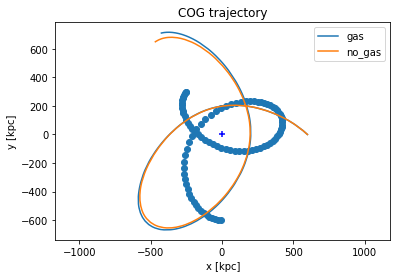

In [19]:
fig, ax = plt.subplots()
for i, sim in enumerate(sims):
    ax.plot(sim.trace.x, sim.trace.y, label=labels[i])
    ax.set_aspect('equal')
    ax.set_xlabel('x [kpc]')
    ax.set_ylabel('y [kpc]')
tidal_sim.compute_cog(save_cache=True)
tidal_sim.plot_cog(ax_cog=ax)
# ax.set_xlim(-800,-400)
# ax.set_ylim(-700,-500)
ax.legend();

# SFH

In [11]:
bins_sfh = 100

In [12]:
# def bin_sfh(times, sfr, bins=100):
#     trange = times.max()-times.min()
#     print(trange)
#     hist, binedges = np.histogram(times, bins=bins, weights=sfr)
#     return hist, binedges

# def bin_sfh(times, sfr, bins=100):
#     trange = times.max()-times.min()
#     print(len(sfr))
#     dt_orig = trange/len(sfr)
#     dt_new = trange/bins
#     bin_width_ratio=dt_orig/dt_new
# #     tot_star = sfr.sum()
#     thebins = np.histogram_bin_edges(times, bins=bins)
#     print(len(thebins))
#     binwidth1 = (times[1]-times[0])/(thebins[1]-thebins[0])
#     print(bin_width_ratio,binwidth1)
# #     print(binwidth)
#     hist, binedges = np.histogram(times, bins=bins, weights=sfr*bin_width_ratio)
#     return hist, binedges

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


(8, 14.373181319954632)

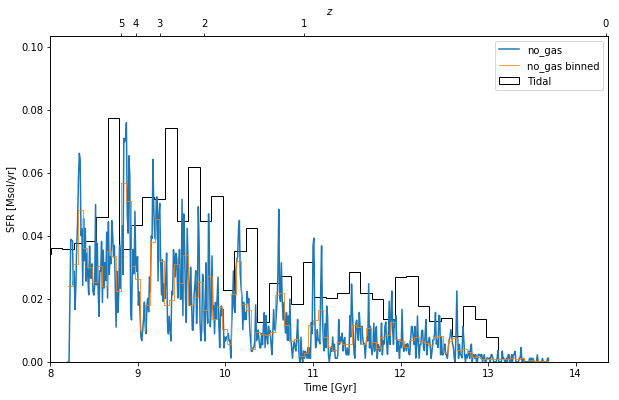

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
tidal_sim.plot_sfh(ax_sfh=ax, label='Tidal', color='k')
ax.plot(tbl_list[1]['t'], tbl_list[1]['sfr'], label=labels[1])
hist, binedges = bin_sfh(tbl_list[1]['t'], tbl_list[1]['sfr'], bins=100)
plot_hist_sfh(hist, binedges, ax=ax, label='no_gas binned', linewidth=0.8)
ax.legend();
ax.set_xlim(8, None)
# ax.set_xlim(13, 13.5)

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


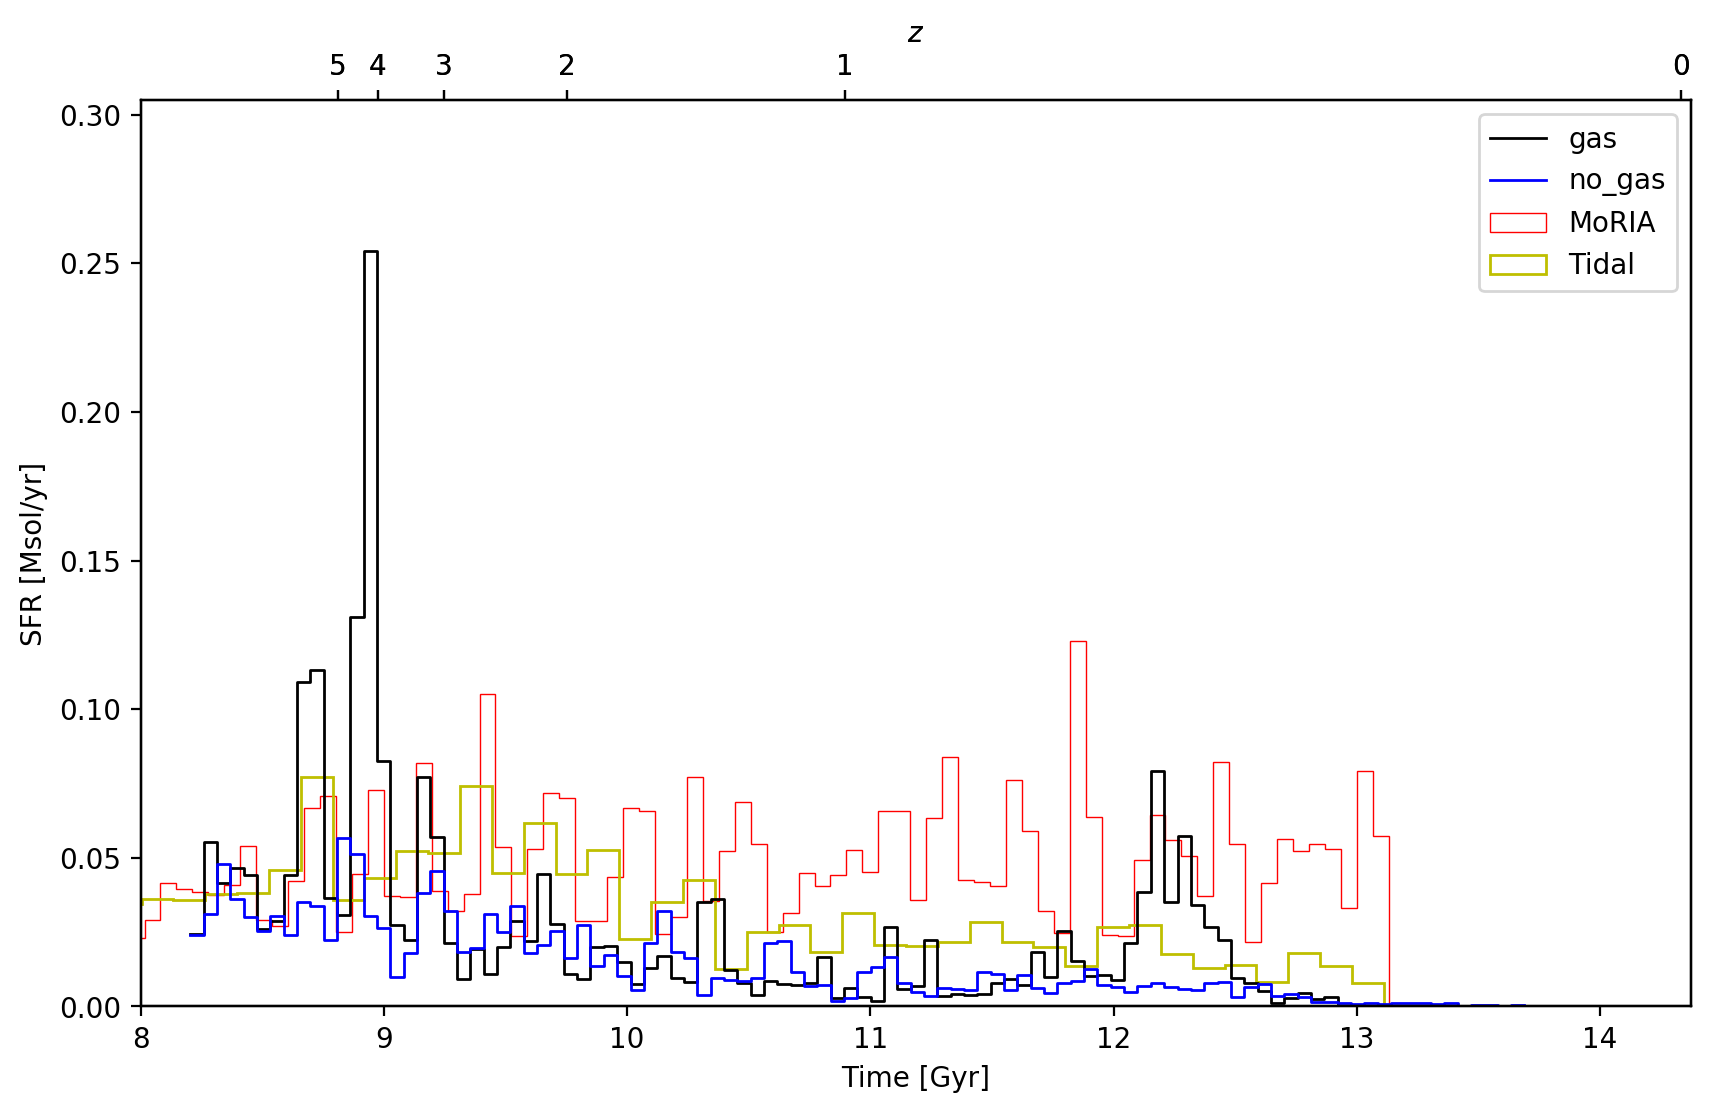

In [14]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
moria_sim.plot_sfh(ax_sfh=ax, bins=200, label='MoRIA', color='r', linewidth=0.5)
# moria_last_snap = pynbody.load('/mnt/data/MoRIA/M1-10_Verbeke2017/M09sim69001/snapshot_0036')
# pynbody.plot.stars.sfh(moria_last_snap.s, bins=200, subplot=ax, label='MoRIA', color='y')
tidal_sim.plot_sfh(ax_sfh=ax, bins=100, label='Tidal', color='y')
# tidal_snap = tidal_sim.snap_list[-1]
# pynbody.analysis.halo.center(tidal_snap.s)
# pynbody.plot.stars.sfh(tidal_snap.s[pynbody.filt.Sphere(10)], subplot=ax, label='tidal_sphere', color='y')
c='kb'
for i,tbl in enumerate(tbl_list):
    hist, binedges = bin_sfh(tbl['t'], tbl['sfr'], bins=100)
    plot_hist_sfh(hist, binedges, ax=ax, label=labels[i], linewidth=1, color=c[i])
ax.set_xlim(8, None)
ax.legend();

# R_eff

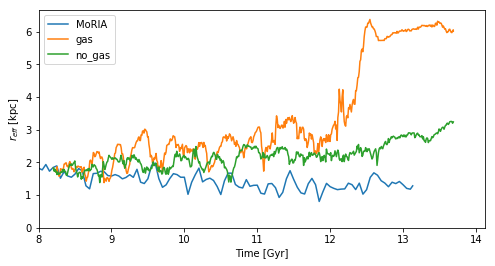

In [29]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(moria_tbl['t'], moria_tbl['r_eff'], label='MoRIA')
for i, tbl in enumerate(tbl_list):
    ax.plot(tbl['t'], tbl['r_eff'], label=labels[i])
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$r_{eff}$ [kpc]')
ax.set_xlim(8, None)
ax.set_ylim(0, None)

ax.legend();

# Metals

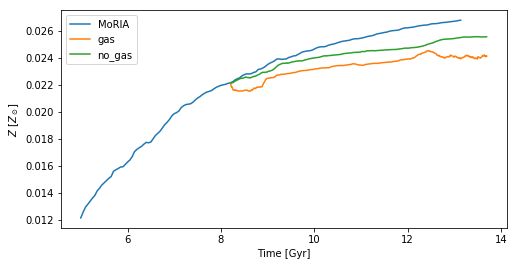

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(moria_tbl['t'], moria_tbl['metals_star'], label='MoRIA')
for i, tbl in enumerate(tbl_list):
    ax.plot(tbl['t'], tbl['metals_star'], label=labels[i])
# ax.set_yscale('log')
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$Z$ [$Z_\odot$]')
ax.legend();